# Flame Speed with Sensitivity Analysis

In this example we simulate a freely-propagating, adiabatic, 1-D flame and
* Calculate its laminar burning velocity
* Perform a sensitivity analysis of its kinetics

The figure below illustrates the setup, in a flame-fixed co-ordinate system. The reactants enter with density $\rho_{u}$, temperature $T_{u}$ and speed $S_{u}$. The products exit the flame at speed $S_{b}$, density $\rho_{b}$ and temperature $T_{b}$.

<img src="images/flameSpeed.png" alt="Freely Propagating Flame" style="width: 300px;"/>

### Import Modules

In [2]:
from __future__ import print_function
from __future__ import division

import cantera as ct
import numpy as np

print("Running Cantera Version: " + str(ct.__version__))

Running Cantera Version: 2.4.0


In [3]:
# Import plotting modules and define plotting preference
%matplotlib notebook
import matplotlib.pylab as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)

# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True

# Import Pandas for DataFrames
import pandas as pd

### Define the reactant conditions, gas mixture and kinetic mechanism associated with the gas

In [4]:
#Inlet Temperature in Kelvin and Inlet Pressure in Pascals
#In this case we are setting the inlet T and P to room temperature conditions
To = 300
Po = 10132

#Define the gas-mixutre and kinetics
#In this case, we are choosing a GRI3.0 gas
gas = ct.Solution('gri30.cti')

# Create a stoichiometric CH4/Air premixed mixture 
gas.set_equivalence_ratio(1.0, 'CH4', {'O2':1.0, 'N2':0})
gas.TP = To, Po

### Define flame simulation conditions

In [5]:
# Domain width in metres
width = 0.014

# Create the flame object
flame = ct.FreeFlame(gas, width=width)

# Define tolerances for the solver
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

# Define logging level
loglevel = 1

### Solve

In [7]:
flame.solve(loglevel=loglevel, auto=True)
Su0 = flame.velocity[0]
print("Flame Speed is: {:.2f} cm/s".format(Su0*100))

# Note that the variable Su0 will also be used downsteam in the sensitivity analysis


*********** Solving on 146 point grid with energy equation enabled ***********

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     4.219e-06      7.615
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.328e-06      7.251
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001081      5.598
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004157      1.654
Attempt Newton solution of steady-state problem...    success.

Problem solved on [146] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state pro

### Plot figures

Check and see if all has gone well. Plot temperature and species fractions to see

#### Temperature Plot

<IPython.core.display.Javascript object>


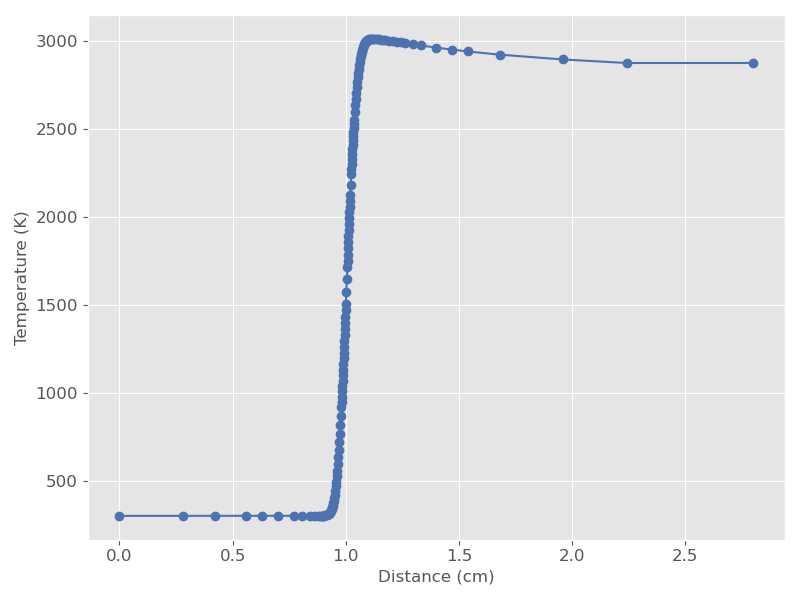

In [8]:
plt.figure()

plt.plot(flame.grid*100, flame.T, '-o')
plt.xlabel('Distance (cm)')
plt.ylabel('Temperature (K)');

#### Major species' plot

To plot species, we first have to identify the index of the species in the array
For this, cut & paste the following lines and run in a new cell to get the index

    for i, specie in enumerate(gas.species()):
        print(str(i) + '. ' + str(specie))

<IPython.core.display.Javascript object>


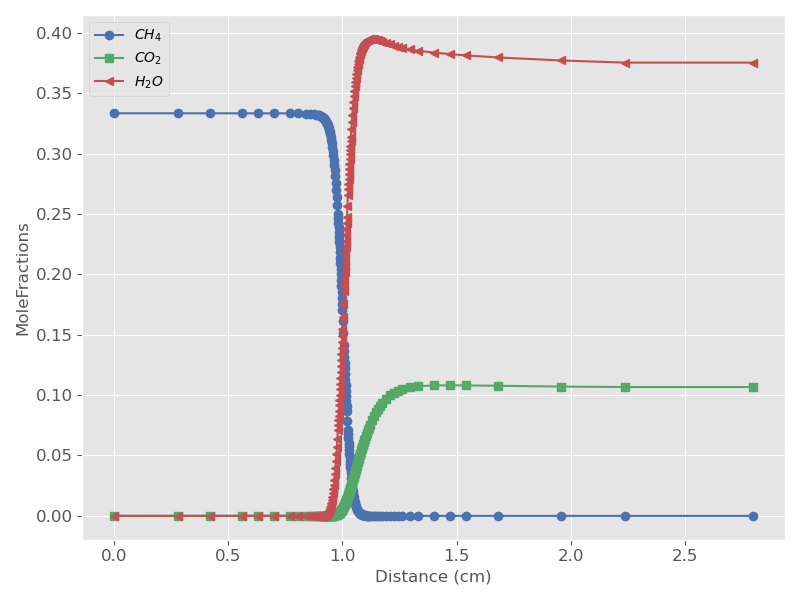

In [9]:
# Extract concentration data
X_CH4 = flame.X[13]
X_CO2 = flame.X[15]
X_H2O = flame.X[5]

plt.figure()

plt.plot(flame.grid*100, X_CH4, '-o', label=r'$CH_{4}$')
plt.plot(flame.grid*100, X_CO2, '-s', label=r'$CO_{2}$')
plt.plot(flame.grid*100, X_H2O, '-<', label=r'$H_{2}O$')

plt.legend(loc=2)
plt.xlabel('Distance (cm)')
plt.ylabel('MoleFractions');